# <center><font color='blue'>EDA for Dataset 1 (step 7-10)</font></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read cleaned dataset
data = pd.read_csv("../data/cleaned_audi.csv")

In [3]:
# Check column types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              10565 non-null  object 
 1   manufactured_year  10565 non-null  int64  
 2   selling_price      10565 non-null  int64  
 3   transmission_type  10565 non-null  object 
 4   mileage            10565 non-null  int64  
 5   fuel_type          10565 non-null  object 
 6   tax                10565 non-null  int64  
 7   engine_size        10565 non-null  float64
 8   car_age            10565 non-null  int64  
 9   miles_per_litre    10565 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 825.5+ KB


## <font color='red'>Step 7: Statistics Summary</font>

### <font color='blue'>1. statistial summary of all data</font>

In [4]:
# numerical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
manufactured_year,10565.0,2017.084524,2.167309,1997.00,2016.0,2017.00,2019.00,2020.00
selling_price,10565.0,22853.956081,11723.076767,1490.00,15000.0,20000.00,27990.00,145000.00
mileage,10565.0,24955.960530,23448.942551,1.00,6000.0,19268.00,36668.00,323000.00
tax,10565.0,125.909134,67.408761,0.00,125.0,145.00,145.00,580.00
engine_size,10565.0,1.942821,0.587387,1.00,1.5,2.00,2.00,6.30
car_age,10565.0,7.915476,2.167309,5.00,6.0,8.00,9.00,28.00
miles_per_litre,10565.0,11.182515,2.851537,4.16,9.0,10.91,12.96,41.42


In [5]:
# numerical + categorical summary
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
model,10565,26,A3,1917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manufactured_year,10565.0,NaN,NaN,NaN,2017.084524,2.167309,1997.0,2016.0,2017.0,2019.0,2020.0
selling_price,10565.0,NaN,NaN,NaN,22853.956081,11723.076767,1490.0,15000.0,20000.0,27990.0,145000.0
transmission_type,10565,3,Manual,4317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,10565.0,NaN,NaN,NaN,24955.96053,23448.942551,1.0,6000.0,19268.0,36668.0,323000.0
fuel_type,10565,3,Diesel,5537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,10565.0,NaN,NaN,NaN,125.909134,67.408761,0.0,125.0,145.0,145.0,580.0
engine_size,10565.0,NaN,NaN,NaN,1.942821,0.587387,1.0,1.5,2.0,2.0,6.3
car_age,10565.0,NaN,NaN,NaN,7.915476,2.167309,5.0,6.0,8.0,9.0,28.0
miles_per_litre,10565.0,NaN,NaN,NaN,11.182515,2.851537,4.16,9.0,10.91,12.96,41.42


### <font color='blue'>2. numerical features summary</font>

In [6]:
# Summary statistics of numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    print(f"\nValue counts for {col}:{data[col].value_counts()}")


Value counts for manufactured_year:manufactured_year
2019    3139
2016    1959
2017    1932
2015     995
2018     860
2020     689
2014     446
2013     290
2012      85
2011      47
2010      32
2009      23
2008      21
2007      16
2006       9
2005       7
2003       6
2004       5
2002       2
1998       1
1997       1
Name: count, dtype: int64

Value counts for selling_price:selling_price
19995    68
19990    57
20000    55
18990    49
26990    48
         ..
3980      1
38480     1
15880     1
27680     1
25390     1
Name: count, Length: 3260, dtype: int64

Value counts for mileage:mileage
5000     190
6000     174
3000      96
1000      95
4000      95
        ... 
23820      1
39750      1
4018       1
1978       1
3103       1
Name: count, Length: 7725, dtype: int64

Value counts for tax:tax
145    5317
30     1207
150    1126
20      620
0       534
125     494
200     391
160     252
235     122
205     105
300      77
165      71
260      55
325      42
240      34
555   

### <font color='blue'>3. category features summary</font>

In [7]:
# Summary statistics of categorical columns
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"--- {col} ---")
    print(data[col].value_counts(normalize=True) * 100)
    print("\n")

--- model ---
model
A3     18.144818
Q3     13.052532
A4     13.014671
A1     12.654993
A5      8.272598
Q5      8.177946
Q2      7.666824
A6      7.079981
Q7      3.729295
TT      3.180312
A7      1.154756
A8      1.116895
Q8      0.653100
RS6     0.369143
RS3     0.312352
RS4     0.293422
R8      0.265026
RS5     0.265026
S3      0.170374
SQ5     0.151443
S4      0.113583
SQ7     0.075722
S8      0.037861
S5      0.028396
A2      0.009465
RS7     0.009465
Name: proportion, dtype: float64


--- transmission_type ---
transmission_type
Manual       40.861335
Semi-Auto    33.771888
Automatic    25.366777
Name: proportion, dtype: float64


--- fuel_type ---
fuel_type
Diesel    52.408897
Petrol    47.326077
Hybrid     0.265026
Name: proportion, dtype: float64




## <font color='red'>Step 8: EDA Univariate Analysis</font>

### <font color='blue'>1. univariate analysis for numerical features</font>

Skew : -1.46


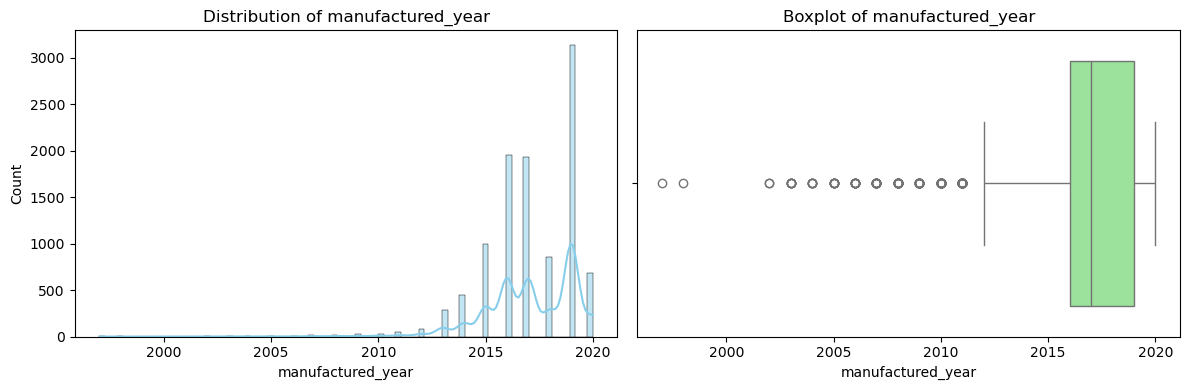

Skew : 2.29


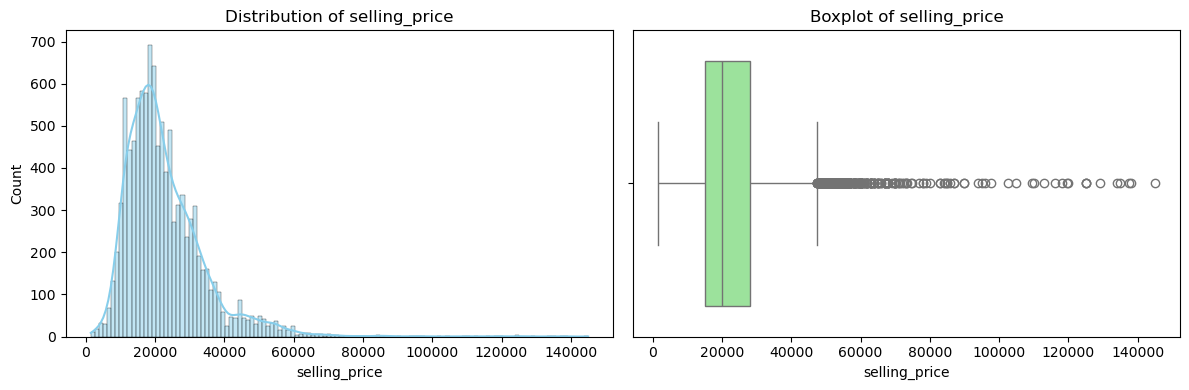

Skew : 1.56


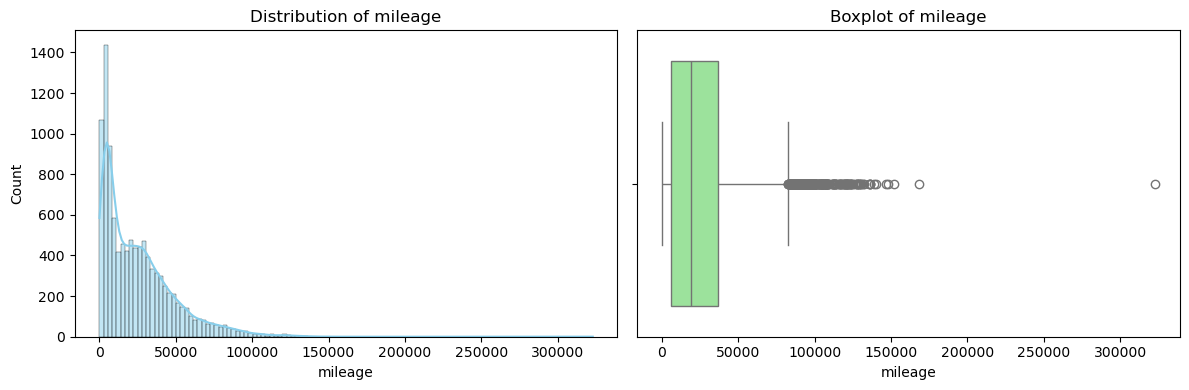

Skew : 0.61


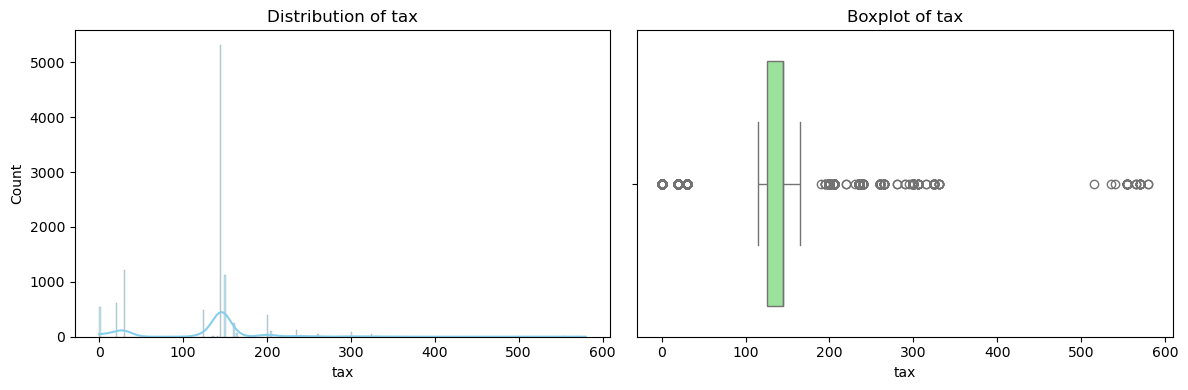

Skew : 1.46


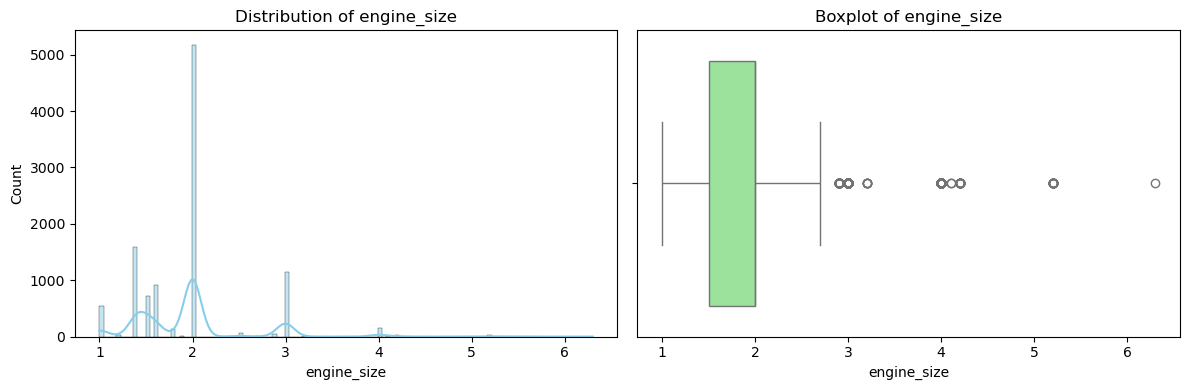

Skew : 1.46


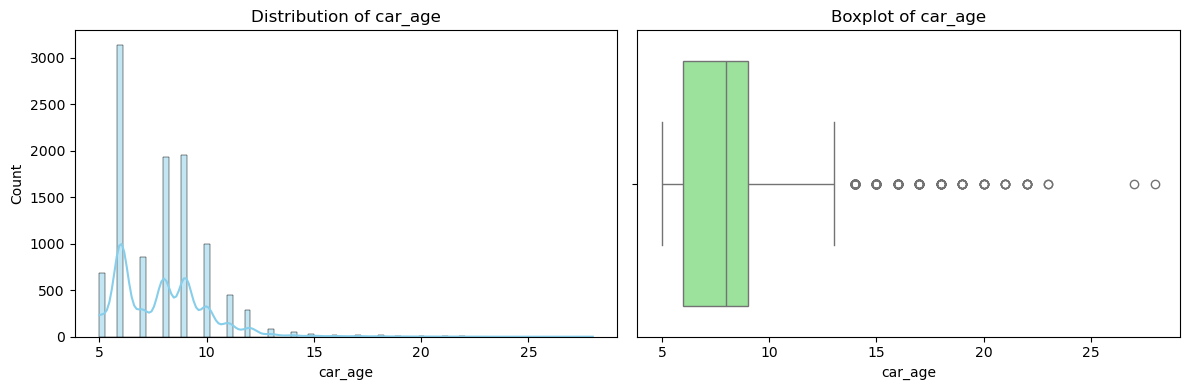

Skew : 1.83


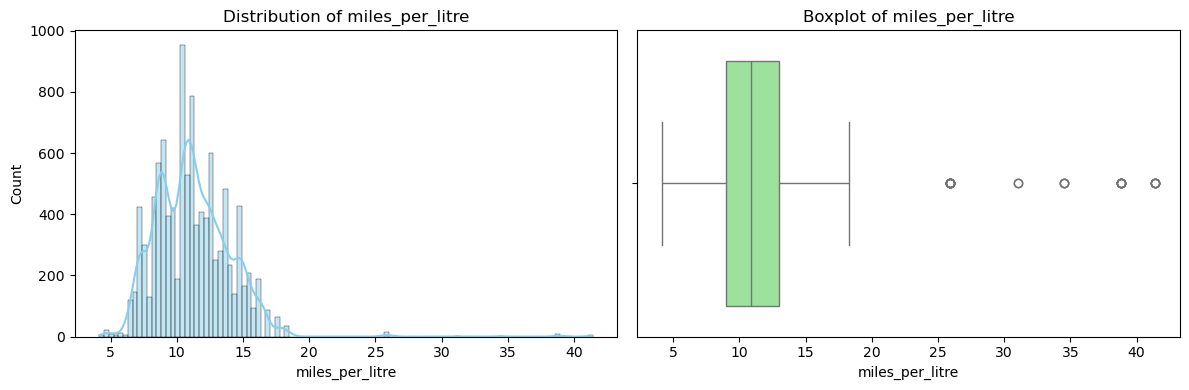

In [8]:
# =========================
# Visualize Distribution of Numerical Columns
# =========================

for col in numerical_cols:
    print('Skew :', round(data[col].skew(), 2))
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram with KDE
    sns.histplot(data[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')

    # Boxplot
    sns.boxplot(x=data[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

### <font color='blue'>2. univariate analysis for categorical features</font>

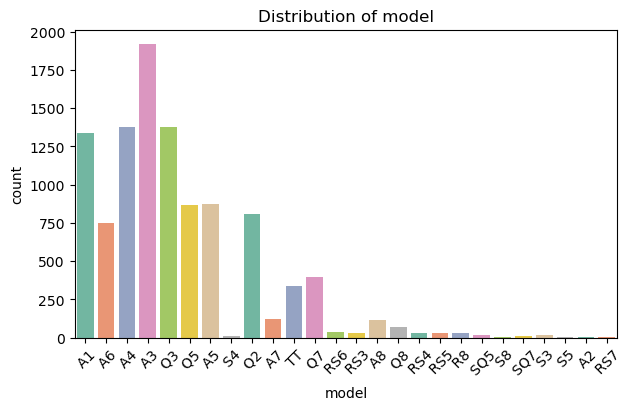

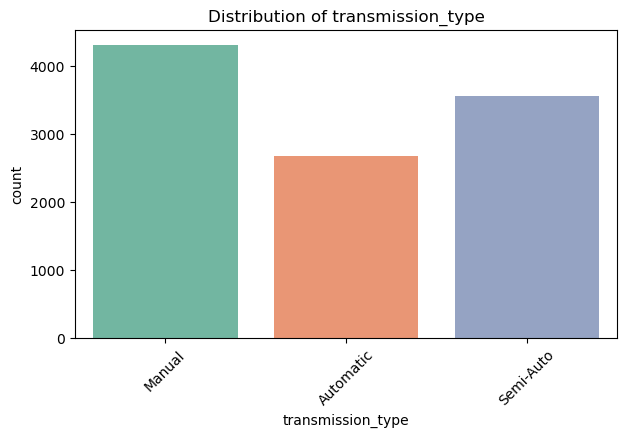

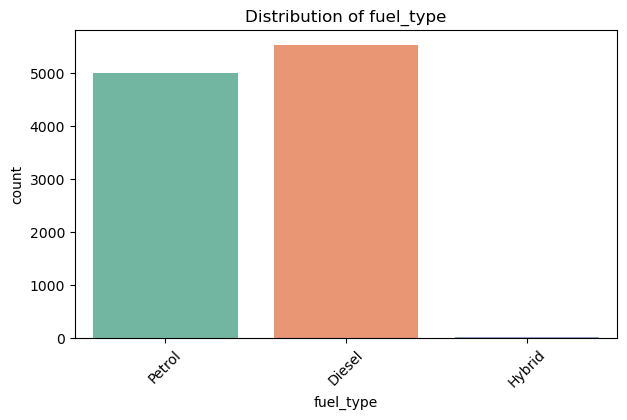

In [9]:
# =========================
# Visualize Distribution of Numerical Columns
# =========================

# bar view
for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=data, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

### <font color='blue'>3. check skewness for all numerical columns</font>

In [10]:
# Calculate skewness for each numerical column and sort from most skewed to least
skewed_features = data[numerical_cols].skew().sort_values(ascending=False)
print(skewed_features)

selling_price        2.289042
miles_per_litre      1.832760
mileage              1.561520
engine_size          1.455914
car_age              1.455534
tax                  0.608338
manufactured_year   -1.455534
dtype: float64


### <font color='blue'>4. apply log1p transformation to highly skewed columns</font>

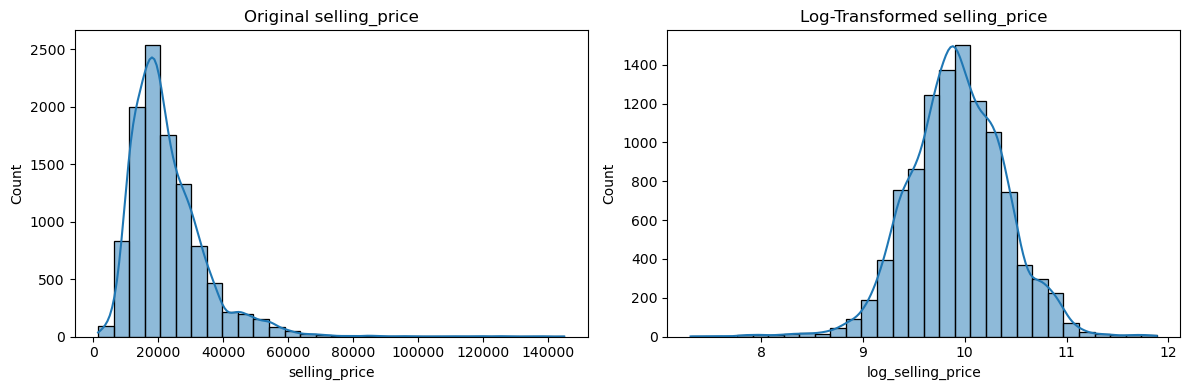

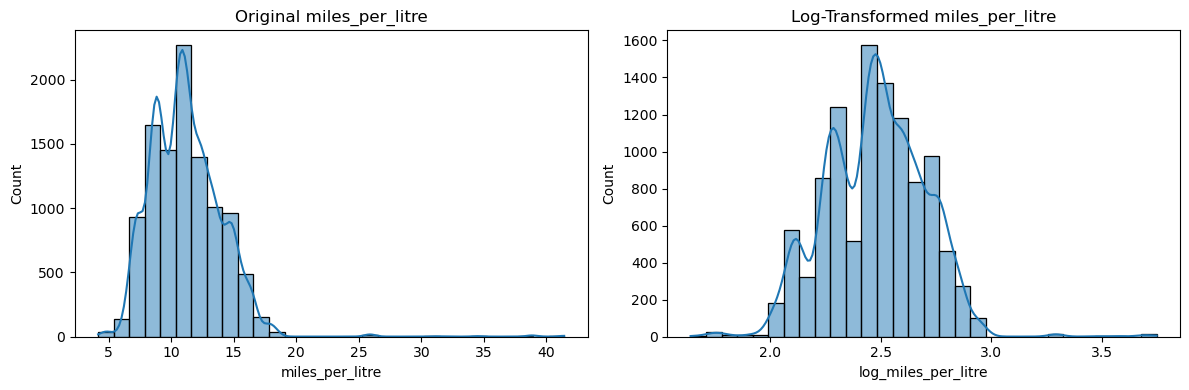

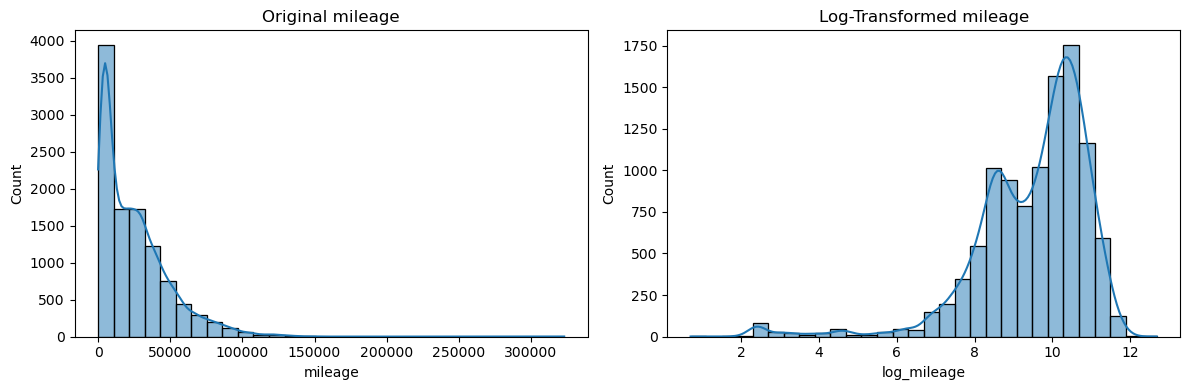

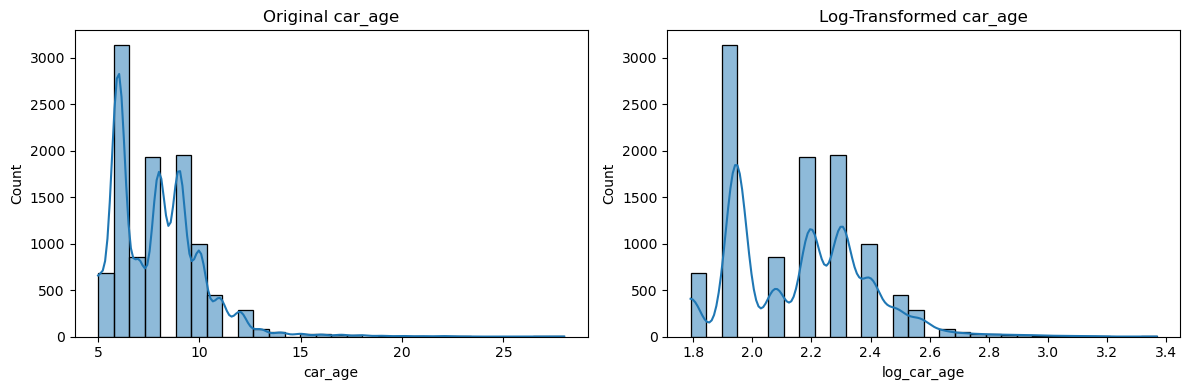

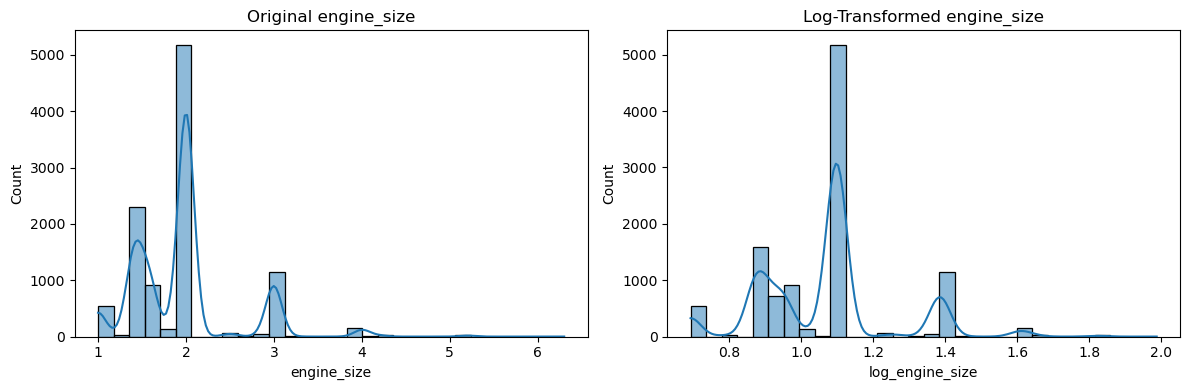

In [11]:
# Apply log1p transformation to highly skewed columns
cols_to_transform = [
    'selling_price',
    'miles_per_litre',
    'mileage',
    'car_age',
    'engine_size',
]

for col in cols_to_transform:
    data[f'log_{col}'] = np.log1p(data[col])  # creates new transformed column

# display before & after log
for col in cols_to_transform:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(data[col], bins=30, ax=axes[0], kde=True)
    axes[0].set_title(f'Original {col}')
    
    sns.histplot(data[f'log_{col}'], bins=30, ax=axes[1], kde=True)
    axes[1].set_title(f'Log-Transformed {col}')
    
    plt.tight_layout()
    plt.show()

### <font color='blue'>5. keep log and remove original one</font>

In [12]:
# Remove original skewed columns and add log-transformed ones
for col in cols_to_transform:
    original = col
    transformed = f'log_{col}'
    
    if original in numerical_cols:
        numerical_cols.remove(original)  # Remove original
    
    if transformed not in numerical_cols:
        numerical_cols.append(transformed)  # Add log-transformed

print("Updated numerical columns:")
print(numerical_cols)

Updated numerical columns:
['manufactured_year', 'tax', 'log_selling_price', 'log_miles_per_litre', 'log_mileage', 'log_car_age', 'log_engine_size']


## <font color='red'>Step 9: EDA Bivariate Analysis</font>

### <font color='blue'>1. Target vs Numerical Features</font>

log_car_age           -0.754132
manufactured_year      0.748222
log_miles_per_litre   -0.669827
log_mileage           -0.588569
log_engine_size        0.505490
tax                    0.409197
dtype: float64


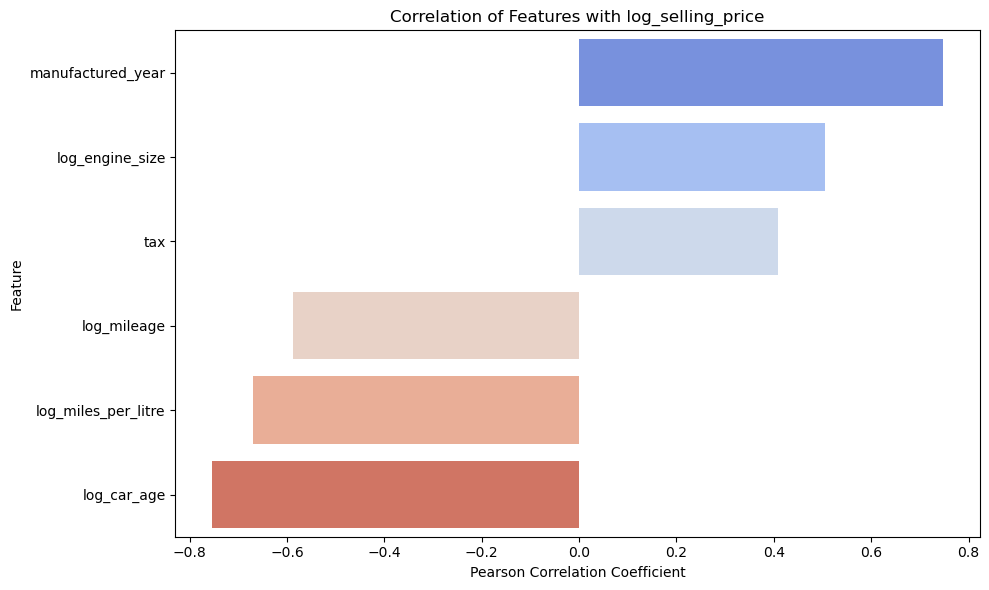

In [13]:
# Define target variable for correlation analysis
target = 'log_selling_price'

# Correlation of each numerical feature with log_selling_price
numerical_cols = [col for col in numerical_cols if col != 'log_selling_price']
correlations = data[numerical_cols].corrwith(data[target]).sort_values(key=abs, ascending=False)

# Filter only correlations with magnitude > 0.1
strong_corr_with_target = correlations[abs(correlations) > 0.1]
print(strong_corr_with_target)

# ==========================================================
# Visualize Correlation of Numerical Features with the Target
# ==========================================================

# Calculate correlations between numerical features and the target
corr_with_log_price = (
    data[numerical_cols]
      .corrwith(data[target])       
      .dropna()
      .sort_values(ascending=False) # Sort highest → lowest correlation
)

# Plot labels and formatting
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_log_price.values, y=corr_with_log_price.index, palette='coolwarm')
plt.title('Correlation of Features with log_selling_price')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### -Newer cars have higher prices
### -Larger engines tend to increase the selling price
### -Higher tax rates price higher because more poweful cars
### -Cars with higher mileage usually sell for less.
### -More fuel-efficient cars are often cheaper (smaller engine size)                                    

### <font color='blue'>2. Target vs Categorical Features</font>


=== Categorical Feature Strength (Correlation Ratio) ===
             Feature   Eta (η)  n Categories
0              model  0.633997            26
1  transmission_type  0.540619             3
2          fuel_type  0.025777             3 



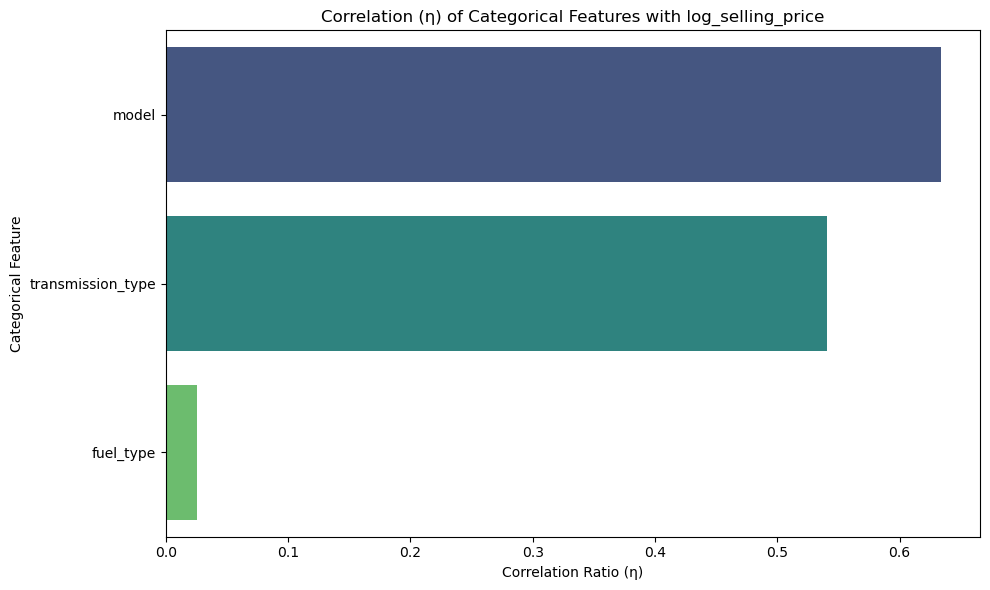

In [14]:
# =====================================================
# Correlation Ratio (η) for Categorical Features vs Target
# =====================================================

# Function to compute correlation ratio (η) which measures the strength
# of association between a categorical variable and a numeric target
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)

    cat_levels = np.unique(categories)
    overall_mean = np.mean(values)

    ss_between = 0
    for cat in cat_levels:
        cat_values = values[categories == cat]
        ss_between += len(cat_values) * (np.mean(cat_values) - overall_mean) ** 2

    ss_total = np.sum((values - overall_mean) ** 2)
    return np.sqrt(ss_between / ss_total)
    
# Compute η for all categorical features
eta_scores = {}
for col in categorical_cols:
    eta = correlation_ratio(data[col], data[target])
    eta_scores[col] = eta

# Sort highest → lowest
eta_scores = dict(sorted(eta_scores.items(), key=lambda x: x[1], reverse=True))
eta_scores

# =====================================================
# Display Categorical Feature Strength Table
# =====================================================
eta_table = pd.DataFrame({
    'Feature': list(eta_scores.keys()),
    'Eta (η)': list(eta_scores.values()),
    'n Categories': [data[col].nunique() for col in eta_scores.keys()]
})

print("\n=== Categorical Feature Strength (Correlation Ratio) ===")
print(eta_table.sort_values('Eta (η)', ascending=False), "\n")

# =====================================================
# Visualization: Correlation Ratio (η) Bar Chart
# =====================================================
plt.figure(figsize=(10, 6))
sns.barplot(x=list(eta_scores.values()), y=list(eta_scores.keys()), palette='viridis')
plt.title('Correlation (η) of Categorical Features with log_selling_price')
plt.xlabel('Correlation Ratio (η)')
plt.ylabel('Categorical Feature')
plt.tight_layout()
plt.show()

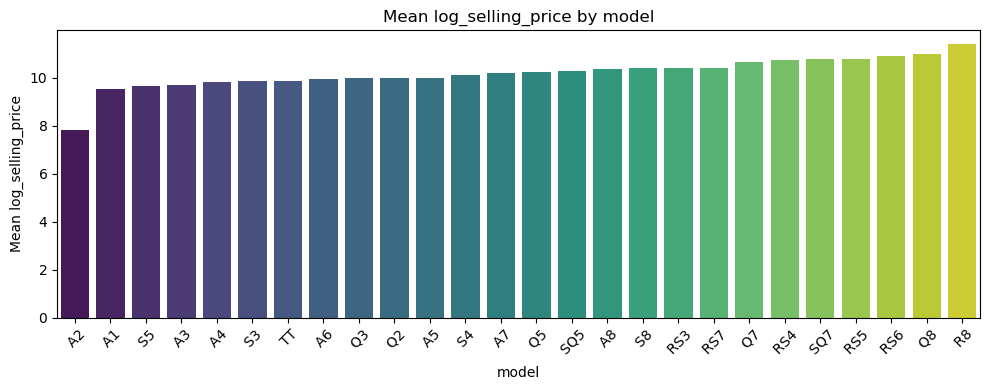

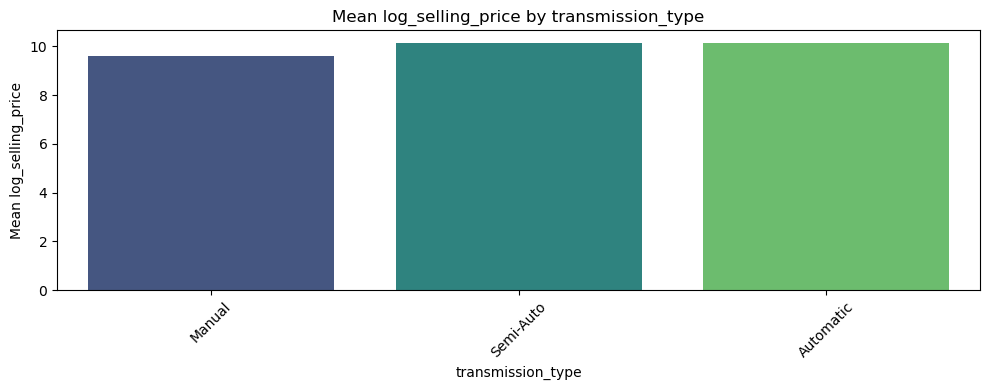

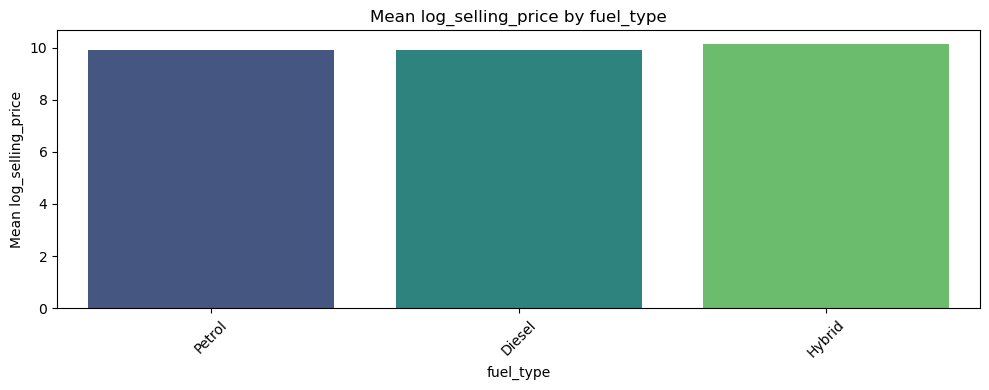

In [15]:
# =====================================================
# Mean Target Value Across Each Category
# =====================================================
# For each categorical feature, compute and visualize the mean target value
# This shows how the average price differs across categories within each feature

for col in categorical_cols:
    mean_values = data.groupby(col)[target].mean().sort_values()
    plt.figure(figsize=(10, 4))
    sns.barplot(x=mean_values.index, y=mean_values.values, palette='viridis')
    plt.title(f'Mean {target} by {col}')
    plt.xticks(rotation=45)
    plt.ylabel(f'Mean {target}')
    plt.tight_layout()
    plt.show()

## <font color='red'>Step 10: EDA Multivariate Analysis</font>

### <font color='blue'>1. Target vs Numerical Features</font>

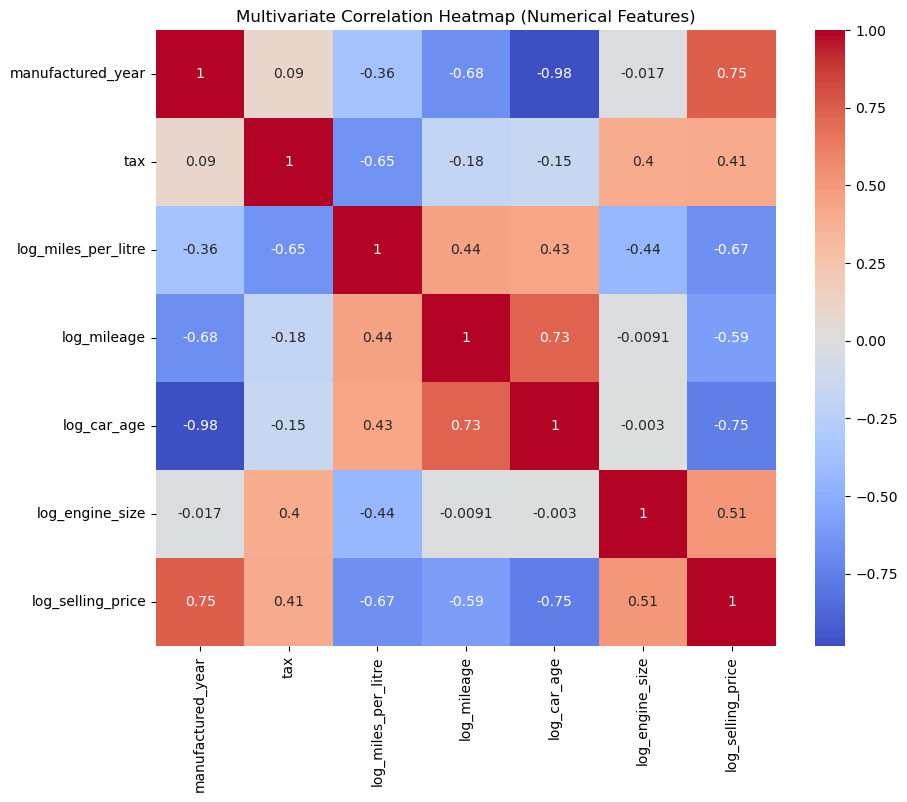

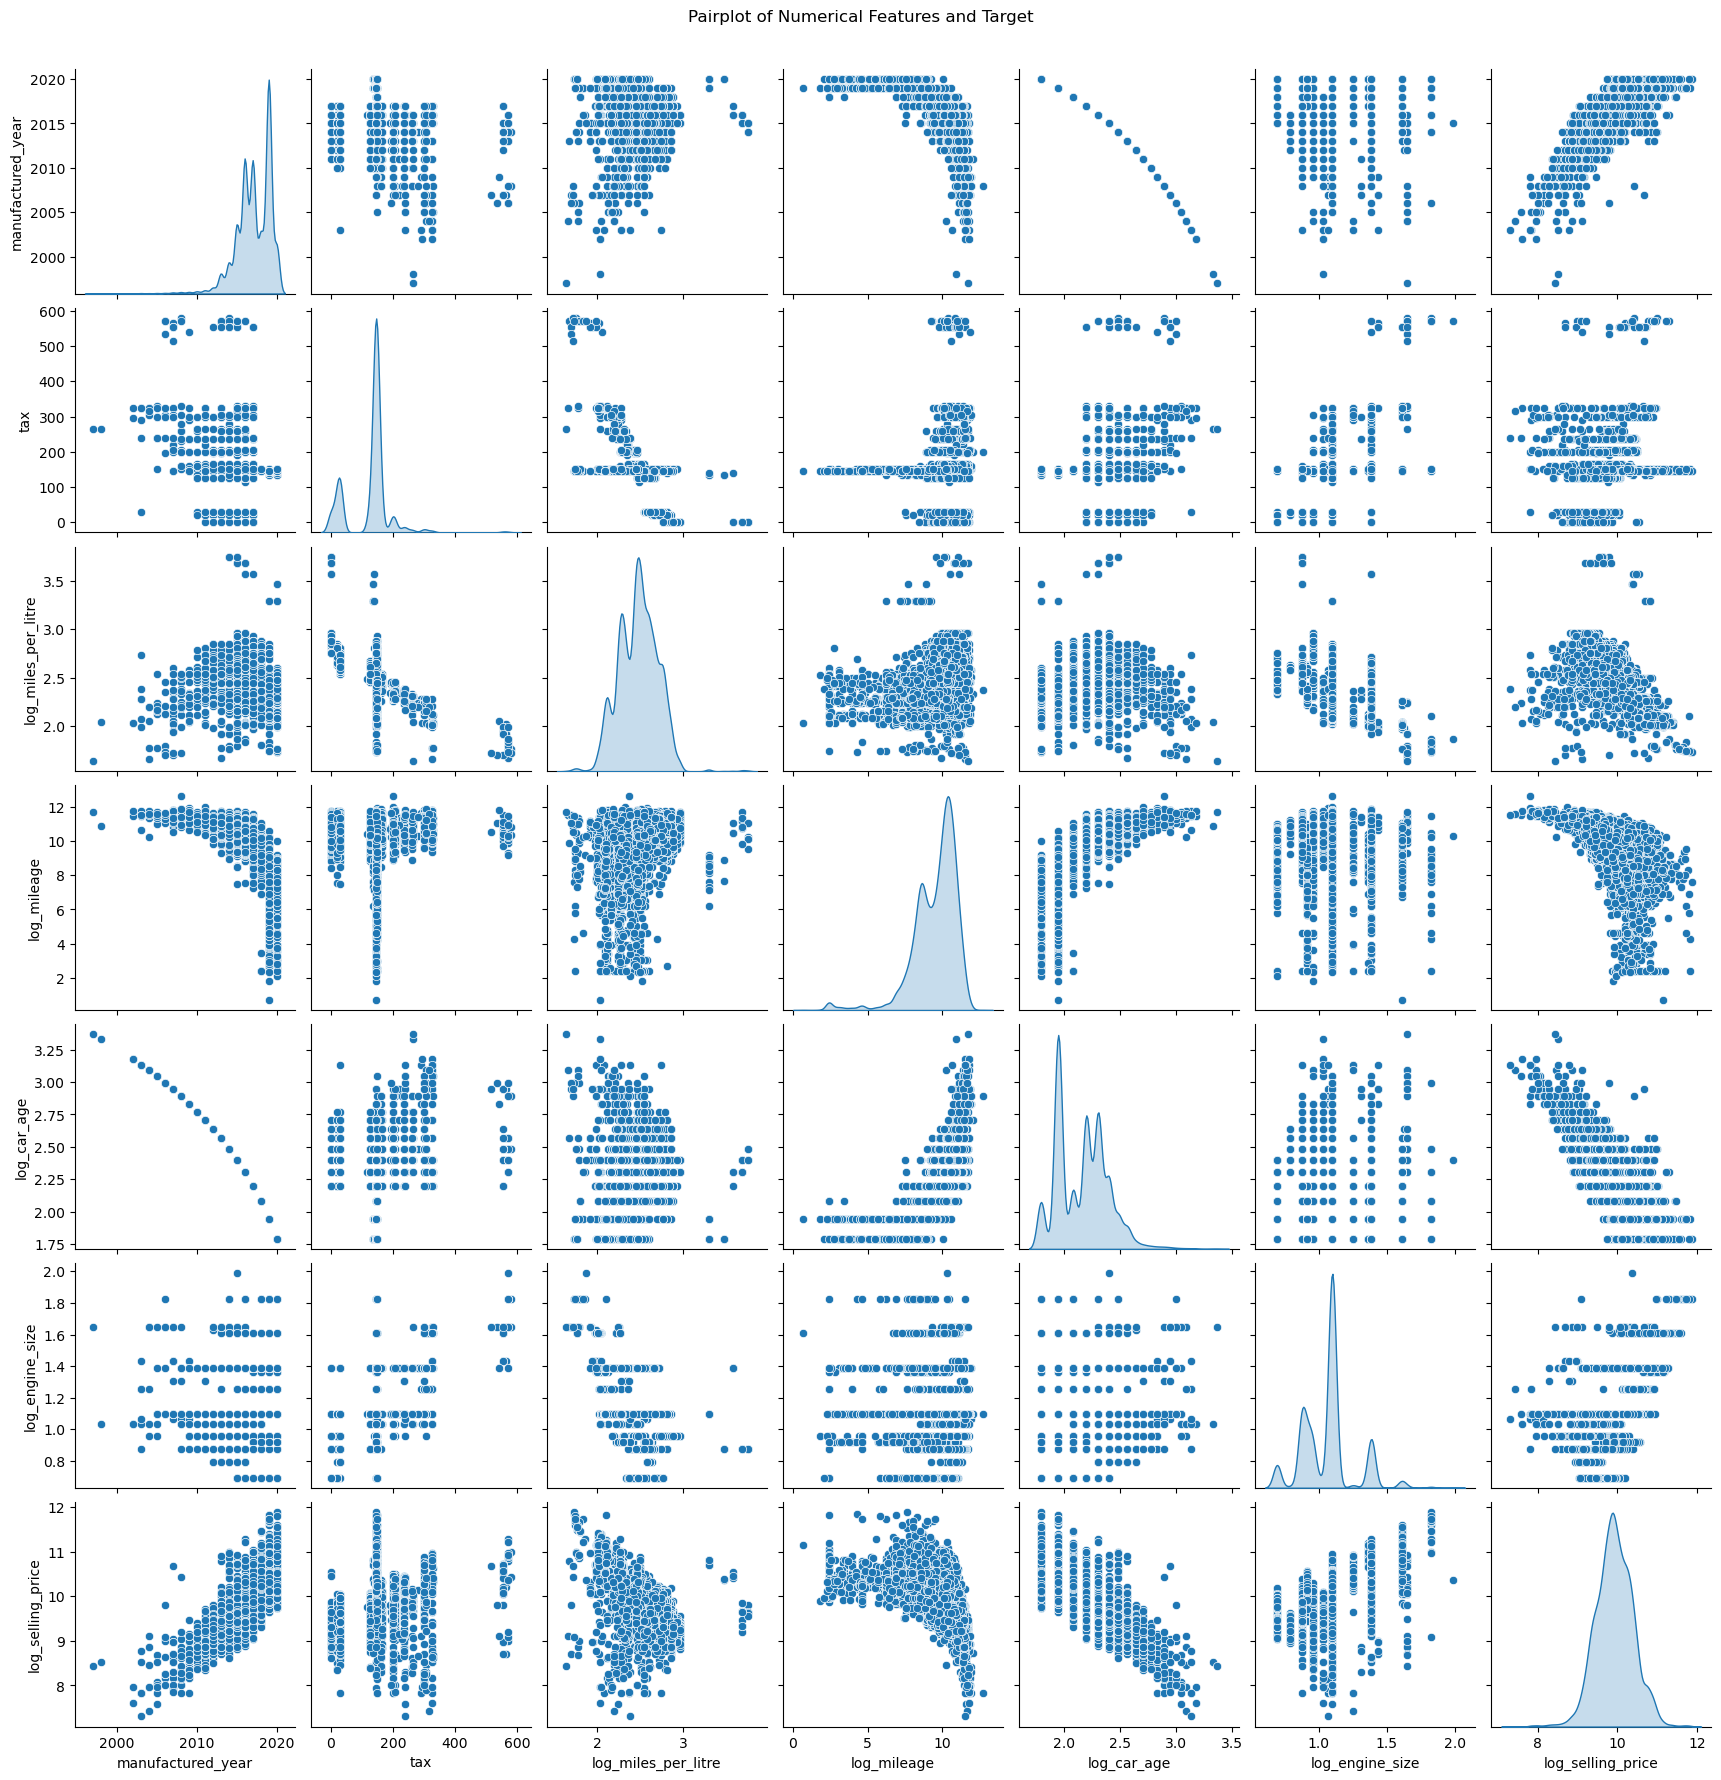

In [16]:
# =====================================================
# Multivariate Correlation Heatmap (Numerical Features)
# =====================================================
plt.figure(figsize=(10, 8))
corr = data[numerical_cols + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Multivariate Correlation Heatmap (Numerical Features)")
plt.show()

# =====================================================
# Pairplot (Scatterplot Matrix) for Numerical Features
# =====================================================
g = sns.pairplot(data[numerical_cols + [target]], diag_kind='kde')
g.fig.suptitle("Pairplot of Numerical Features and Target", y=1.02)
plt.show()

### <font color='blue'>2. Target vs Categorical Features</font>

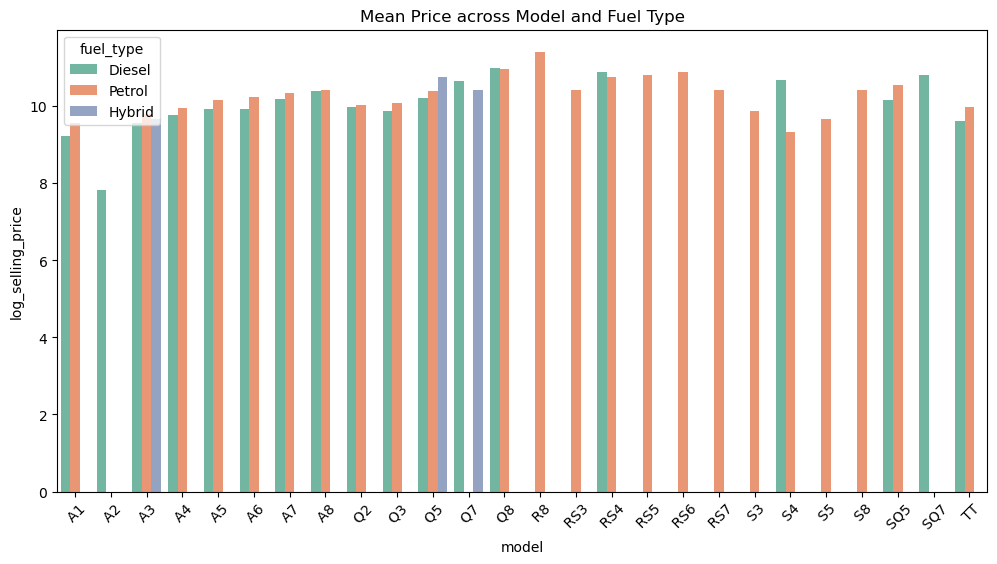

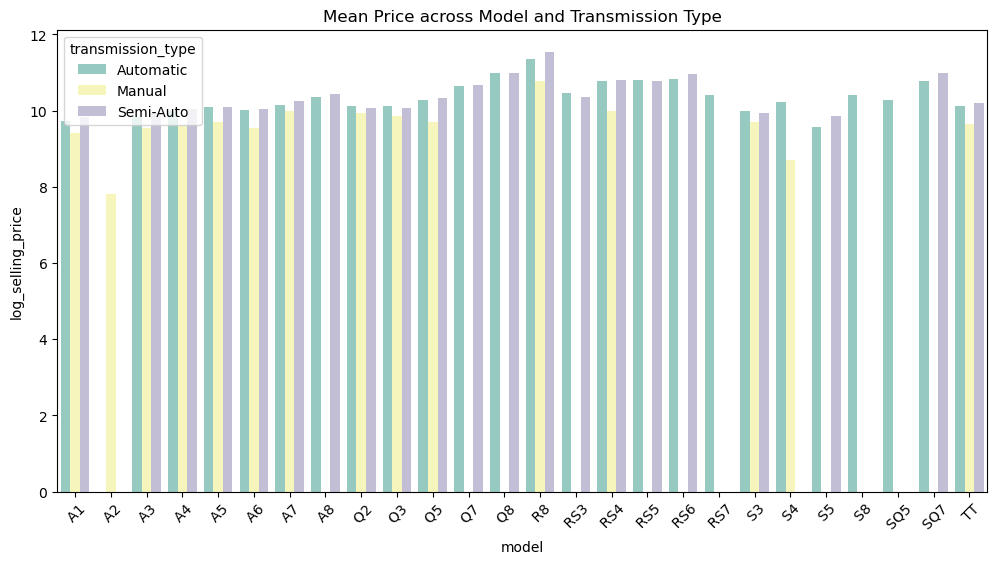

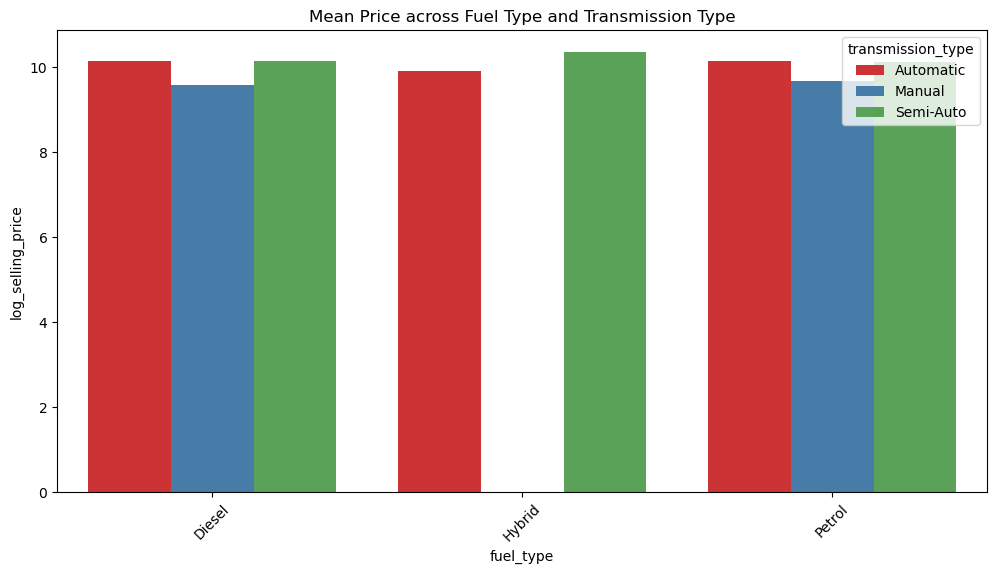

In [17]:
# =====================================================
# Multivariate Analysis: Model × Fuel Type vs Price
# =====================================================

# Compute the mean target value for each combination of model and fuel type
mean_table = data.groupby(["model", "fuel_type"])[target].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=mean_table, x="model", y=target, hue="fuel_type", palette="Set2")
plt.xticks(rotation=45)
plt.title("Mean Price across Model and Fuel Type")
plt.show()

# =====================================================
# Multivariate Analysis: Model × Transmission Type vs Price
# =====================================================

# Compute the mean target value for each model and transmission type
mean_table = data.groupby(["model", "transmission_type"])[target].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=mean_table, x="model", y=target, hue="transmission_type", palette="Set3")
plt.xticks(rotation=45)
plt.title("Mean Price across Model and Transmission Type")
plt.show()

# =====================================================
# Multivariate Analysis: Fuel Type × Transmission Type vs Price
# =====================================================

# Compute the mean target value for each fuel type and transmission type combination
mean_table = data.groupby(["fuel_type", "transmission_type"])[target].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=mean_table, x="fuel_type", y=target, hue="transmission_type", palette="Set1")
plt.xticks(rotation=45)
plt.title("Mean Price across Fuel Type and Transmission Type")
plt.show()